# **Méthode de Dummy Regressor** :

Cette [méthode](https://runebook.dev/fr/docs/scikit_learn/modules/generated/sklearn.dummy.dummyregressor#:~:text=None%20%5Bsource%5D-,DummyRegressor%20est%20un%20r%C3%A9gresseur%20qui%20effectue%20des%20pr%C3%A9dictions%20%C3%A0%20l,pas%20pour%20des%20probl%C3%A8mes%20r%C3%A9els.) consiste à faire des prédictions en utilisant des règles simples, ici on utilise la moyenne dans notre modèle. 

# **Sommaire** :     

1.[Import des jeux de données](#Imports)

2.[Regression linéaire sur les émissions de CO2](#CV)

3.[Regression linéaire sur l'utilisation d'énergie](#hp)



<a name="Imports"></a>
## **Import des jeux de données :**





Dummy Regressor:



In [1]:
from ast import literal_eval 

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

import statistics
import re
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
X_train = pd.read_csv('/content/drive/MyDrive/X_trainlog.csv',sep='\t')
X_test = pd.read_csv('/content/drive/MyDrive/X_testlog.csv',sep='\t')

Mounted at /content/drive


In [2]:
Y_train = pd.read_csv('/content/drive/MyDrive/Y_trainlog.csv',sep='\t')
Y_test = pd.read_csv('/content/drive/MyDrive/Y_testlog.csv',sep='\t')

On importe ici les jeux d'entrainement et de test qu'on a splittés dans les précedents Notebooks.

On utilise ici la librairie [sklearn](https://scikit-learn.org/stable/) qui contient les méthodes de Machine Learning. On importe cross_val_score qui nous permet de faire une validation croisée.

La [validation croisée](https://docs.aws.amazon.com/fr_fr/machine-learning/latest/dg/cross-validation.html) est une méthode d'évalutation d'un modèle qui va nous permettre de voir si ce modèle peut se généraliser sans trop se spécialiser (surapprentissage), mais aussi sans manquer de trop de précision (sous-apprentissage).

In [3]:
#entrainement du modèle
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [4]:
lm = DummyRegressor(strategy="mean")
 

In [5]:
len(X_train.columns)

30

On va faire ici une validation croisée qui consiste à découper le jeu de données en plusieurs parties (ici 5) afin de trouver les meilleurs paramètres possibles pour notre méthode de régression linéaire. Pour chaque partie, on obtient le MSE correspondant à l'erreur quadratique de notre méthode, elle sert a mesurer la performance de la regression linéaire, plus elle est basse mieux notre modèle marche.

In [6]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
score=cross_val_score(lm,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
print(abs(score))
print("%0.3f MSE with a standard deviation of %0.3f" % (abs(score).mean(), abs(score).std()))

[68616.9093842  72649.90950327 67187.23404199 68859.20133503
 67245.97353704]
68911.846 MSE with a standard deviation of 1990.593


Le temps d'éxecution du modèle étant un paramètre important lors de la selection d'un modèle de machine learning, on va le mesurer.

<a name="CV"></a>
##Regression Dummy sur les émissions de CO2

In [7]:
import timeit 
lm = DummyRegressor(strategy="mean")
start_time=timeit.default_timer()
lm.fit(X_train,Y_train['TotalGHGEmissions'])

DummyRegressor()

On mesure maintenant la performance de notre modèle avec nos métriques étant le coéfficient de détermination et l'MSE.

Le coéfficient de détermination, habituellement compris entre 0 et 1, détermine la plage sur laquelle la régression linéaire s'est appliquée, plus sa valeur s'approche de 1, plus notre modèle est efficace.

Pour l'émission de CO2, le R2 étant très faible on en conclut que notre modèle n'est pas vraiment efficace.

In [8]:
X_test.round(decimals = 2)
X_train.round(decimals = 2)
Y_test.round(decimals = 2)
Y_train.round(decimals = 2)

MSE_CO2=[]
Y_pred = lm.predict(X_test)

MSE_lin=mean_squared_error(Y_test['TotalGHGEmissions'],Y_pred)
MSE_CO2.append(MSE_lin)
print('Notre MSE est égal à %0.2f' %MSE_lin)

#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)

MAPE= mean_absolute_percentage_error(Y_test['TotalGHGEmissions'], Y_pred) * 100

print('MAPE :' ,round(MAPE, 2 ) , '%')
# Evaluation du training set

lineartime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(lineartime, 2 ))  
rmse_linear = (np.sqrt(mean_squared_error(Y_test['TotalGHGEmissions'], Y_pred)))
rmse_linear = round(rmse_linear, 2)
r2_linear= r2_score(Y_test['TotalGHGEmissions'], Y_pred)
R2_CO2=[]
temps_CO2=[]
temps_CO2.append(lineartime)
R2_CO2.append(r2_linear)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_linear))
print('le score R2 coeff de determination est de %0.2f' %(r2_linear))
#print('\n')
MSETRAIN= lm.score(X_train,Y_train['TotalGHGEmissions'])
MSETRAIN = round(MSETRAIN, 2)
MSETEST = lm.score(X_test,Y_test['TotalGHGEmissions'])
MSETEST = round(MSETEST, 2)
print('MSE Train Score :', MSETRAIN)
print('MSE Test Score :', MSETEST)
r2_linear.round(decimals = 2)
MSE_lin.round(decimals = 2)
MSETEST.round(decimals = 2 )
MSETRAIN.round(decimals=2 )


Notre MSE est égal à 2.49
MAPE : 91.32 %
Voici le temps de calcul en ms 0.16
RMSE est 1.58
le score R2 coeff de determination est de -0.01
MSE Train Score : 0.0
MSE Test Score : -0.01


0.0

Dans le cadre d'une comparaison des performances de nos modèles, on crée deux nouveaux dataframes appelés Met_CO2 et Met_En, auquels on ajoute les métriques pour chaque modèle utilisé.

In [9]:
column_names = ["MSE","R2","time"]

Met_CO2 = pd.DataFrame(columns = column_names)

new_row = {'MSE': MSE_lin, 'R2': r2_linear, 'time': lineartime}
Met_CO2 = Met_CO2.append(new_row, ignore_index=True)

In [10]:
display(Met_CO2)

,MSE,R2,time
0,2.489447,-0.010528,0.155371


On observe via nos métriques ci-dessus que l'erreur dans notre régression linéaire est élevée et le R2 trop faible, et comme on le verra ci-dessous dans nos graphiques, notre modèle n'est pas efficace.

Note: le MSE calculé via la fonction méthode.score est le MSE générique de base pour le modèle en se basant sur le jeu de test ou d'entrainement, on a pas besoin de nos valeurs prédites pour le calculer.

Hormis celà, le MSE calculé plus au dessus se base sur les valeurs prédites que l'on possède.

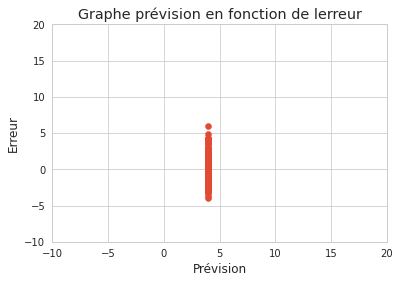

In [11]:
erreur=Y_pred-Y_test['TotalGHGEmissions'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()
#todo:graph plus grands

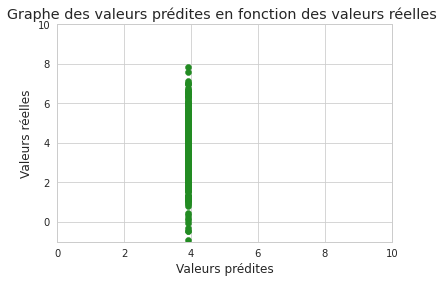

In [12]:
plt.figure()
plt.scatter(Y_pred,Y_test['TotalGHGEmissions'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(0,10)
plt.ylim(-1,10)
plt.show()

<a name="hp"></a>
##Regression linéaire sur l'utilisation d'énergie

In [13]:
lm.fit(X_train,Y_train['SiteEnergyUse(kBtu)'])
Time=[]
MSE_En=[]
R2_En=[]

In [14]:
Y_pred_bis = lm.predict(X_test)
MSE_lin_bis=mean_squared_error(Y_test['SiteEnergyUse(kBtu)'],Y_pred_bis)

print('Notre MSE est égal à %0.2f' %MSE_lin_bis)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE_bis= mean_absolute_percentage_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis) * 100
print('MAPE :' ,MAPE_bis, '%')
# Evaluation du training set

lineartime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',lineartime)   

rmse_linear_bis = (np.sqrt(mean_squared_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)))
r2_linear_bis= r2_score(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)

#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_linear_bis))
print('le score R2 coeff de determination est de %0.2f' %(r2_linear_bis))
#print('\n')
print('MSE Train Score :', lm.score(X_train,Y_train['SiteEnergyUse(kBtu)']))
print('MSE Test Score :', lm.score(X_test,Y_test['SiteEnergyUse(kBtu)']))

Notre MSE est égal à 1.81
MAPE : 7.462849932042028 %
Voici le temps de calcul en ms 1.0748270449999922
RMSE est 1.3465476252481534
le score R2 coeff de determination est de -0.01
MSE Train Score : 0.0
MSE Test Score : -0.0061417064904985


In [15]:

MSE_En.append(MSE_lin_bis)
R2_En.append(r2_linear_bis)
Time.append(lineartime)



In [16]:
column_names = ["MSE","R2","time"]

Met_En = pd.DataFrame(columns = column_names)

new_row = {'MSE': MSE_lin_bis, 'R2': r2_linear_bis, 'time': lineartime}
Met_En = Met_En.append(new_row, ignore_index=True)


In [17]:
display(Met_En)

,MSE,R2,time
0,1.813191,-0.006142,1.074827


In [18]:
Met_En

,MSE,R2,time
0,1.813191,-0.006142,1.074827


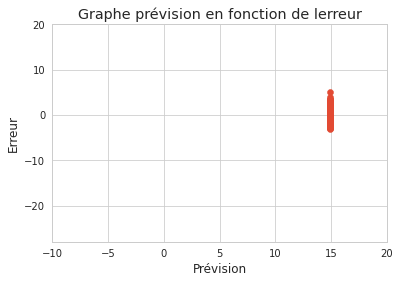

In [19]:
erreur=Y_pred_bis-Y_test['SiteEnergyUse(kBtu)'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred_bis,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-28,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()


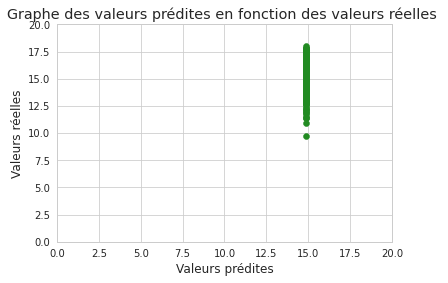

In [20]:
plt.figure()
plt.scatter(Y_pred_bis,Y_test['SiteEnergyUse(kBtu)'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

Conclusion : Nous n'avons pas de relation linéaire entre les valeurs réelles et les valeurs prédites et nos métriques sont mauvaises : notre modèle de dummy regressor affiche la moyenne et ne peut pas nous servir dans notre cas.

In [21]:
Met_CO2

,MSE,R2,time
0,2.489447,-0.010528,0.155371


In [22]:
Met_CO2.to_csv("/content/drive/MyDrive/MetCO2.csv", sep='\t')
Met_En.to_csv("/content/drive/MyDrive/MetEn.csv", sep='\t')